<h2 align="center">Customer Loyalty Score Prediction</h2> 

<strong>This Capstone project deals with the "loyalty score prediction" for elo merchant category recommendation. Elo is one of the largest payments brands in Brazil and has tied up partnership with merchants in order to offer promotions and discounts to cardholders. </strong>

<strong> So, in order to reduce commotion and ease out the campaign process of Elo and their partnered merchants it will be beneficial to predict the loyalty score for every customer. It is based on these loyalty score it will be decided to which customers should the recommendation of restuarants with discounts from your credit card provider for a local place shall be offered provided. </strong>

### Dataset

1. Data_Dictionary
2. historical_transactions
3. old merchants
4. new_merchant transactions
5. test dataset
6. train dataset

#### Defining some variables in the dataset

merchant_id: Unique merchant identifier <br>
merchant_group_id: Merchant group <br>
merchant_category_id: Unique identifier for merchant category <br>
subsector_id: Merchant category group <br>
most_recent_sales_range: Range of revenue (monetary units) in last active month --> A > B > C > D > E <br>
most_recent_purchases_range: Range of quantity of transactions in last active month --> A > B > C > D > E <br>
avg_sales_lag3: Monthly average of revenue in last 3 months divided by revenue in last active month
avg_purchases_lag3: Monthly average of transactions in last 3 months divided by transactions in last active month <br>
active_months_lag3: Quantity of active months within last 3 months <br>
avg_sales_lag6: Monthly average of revenue in last 6 months divided by revenue in last active month <br>
avg_purchases_lag6: Monthly average of transactions in last 6 months divided by transactions in last active month <br>
active_months_lag6: Quantity of active months within last 6 months <br>
avg_sales_lag12: Monthly average of revenue in last 12 months divided by revenue in last active month <br>
avg_purchases_lag12: Monthly average of transactions in last 12 months divided by transactions in last active month <br>
active_months_lag12: Quantity of active months within last 12 months <br>


#### Predicting the loyalty score for recommendation results in a regressional output. We will be using Ensemble Learning and Deep Learning neural networks(using tensor-flow) for predicting the loyalty score. Let's talk a brief about Ensemble learning.

#### ENSEMBLE LEARNING:

Ensemble learning combines the effective power of combined learners used for model building and the result is a single model which gives the "aggregated" output from the several models.The reason for implementing ensemble learning is that it gives excellent performance and speed as it comprises of base learners. Base learners are those learners which could be either from the same learning algorithm or different learning algorithm. In this ensemble learning technique, XGBoost and LGBoost are used and 50-50% of the predictions from these two algo has been used for aggregating the final predictions which is known as the Ensemble Algorithm.

The base learners in boosting are weak learners in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners. The final strong learner brings down both the bias and the variance.

Benefits of XGB Algorithm are as follows:

1. REGULARISATION
2. HANDLING SPARSE DATA
3. CACHE AWARENESS
4. OUT-OF-CORE COMPUTING

Benefits of LGB Algorithm are as follows:

1. HIGH SPEED
2. LOW MEMORY TO RUN
3. SUPPORTS GPU LEARNING
4. FOCUSES ON THE ACCURACY OF RESULTS

_BOTH THESE ALGORITHMS - LGB AND XGB ARE GRADIENT BOOSTING ALORITHMS ARE TREE BASED LEARING ALGORITHMS._ <br>

__From the size of the dataset it can be concluded that the length for the nummber of rows is greater than 10,000 
which means ensemble learning using the boosting techique can easily be used for model building otherwise the  boosting technique implemetation especially lgboost can be sensitive to overfitting the data and can easily overfit 
small data. There is no threshold on the number of rows chosen for this process and it's good to use it for more than 
10,000+ rows datasets.__


In [51]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [52]:
# Importing Data Dictionary

xls = pd.ExcelFile('Data_Dictionary.xlsx')
Data_Dictionary1 = pd.read_excel(xls, 'train')
Data_Dictionary2 = pd.read_excel(xls, 'merchant')
Data_Dictionary2 = pd.read_excel(xls, 'history')
Data_Dictionary2 = pd.read_excel(xls, 'new_merchant_period')

In [53]:
# As we will be training the "train.csv" file and testing it on the "test.csv" file, so we are reading these 
# files using the pandas function "read_csv". "first_active_month" column in both the files is used knowing the 
# first time the card got activated by respective customers. This column is parsed as date and time column.

train_df = pd.read_csv("train.csv", parse_dates=["first_active_month"]) 
test_df = pd.read_csv("test.csv", parse_dates=["first_active_month"])


# Knowing the size of the dataset.


print("Number of rows and columns in train set : ",train_df.shape)
print("Number of rows and columns in test set : ",test_df.shape)

Number of rows and columns in train set :  (201917, 6)
Number of rows and columns in test set :  (123623, 6)


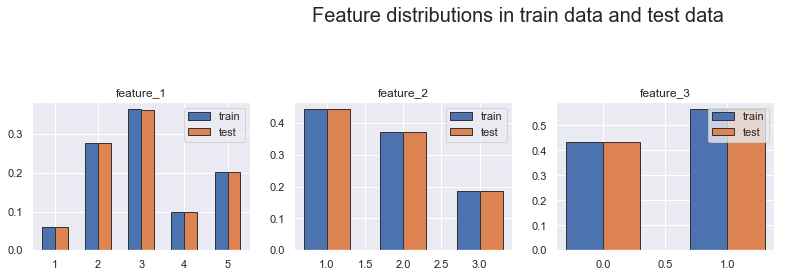

In [54]:
%matplotlib inline

plt.figure(figsize=[18,6])
plt.suptitle('Feature distributions in train data and test data', fontsize=20, y=1.1)
for num, col in enumerate(['feature_1', 'feature_2', 'feature_3']):
    plt.subplot(2, 4, num+1)
    if col is not 'target':
        v_c = train_df[col].value_counts() / train_df.shape[0]
        plt.bar(v_c.index, v_c, label=('train'), align='edge', width=-0.3, edgecolor=[0.2]*3)
        v_c = test_df[col].value_counts() / test_df.shape[0]
        plt.bar(v_c.index, v_c, label=('test'), align='edge', width=0.3, edgecolor=[0.2]*3)
        plt.title(col)
        plt.legend()
plt.show()


__Looks like the test and train data are distributed similarly.__

In [55]:
# Information of both the dataframes

print("Basic information of Train Dataframe: ")
print(train_df.info())

print(" ")
print("Basic information of Test Dataframe: ")
print(test_df.info())

Basic information of Train Dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null datetime64[ns]
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 9.2+ MB
None
 
Basic information of Test Dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 6 columns):
first_active_month    123622 non-null datetime64[ns]
card_id               123623 non-null object
feature_1             123623 non-null int64
feature_2             123623 non-null int64
feature_3             123623 non-null int64
target                123623 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memo

__We can see that there is no null values in train and test data set.__

In [56]:
# Printing the data types of data frames

print("Data types of Train set: ")
print(train_df.dtypes)

print( " ")
print("Data types of Test set: ")
print(test_df.dtypes)

Data types of Train set: 
first_active_month    datetime64[ns]
card_id                       object
feature_1                      int64
feature_2                      int64
feature_3                      int64
target                       float64
dtype: object
 
Data types of Test set: 
first_active_month    datetime64[ns]
card_id                       object
feature_1                      int64
feature_2                      int64
feature_3                      int64
target                       float64
dtype: object


__It shows that the columns in the train and test dataset is integer and card id is object.__

In [57]:
# Printing the head of train data frame.

print("Head of Train set:")
train_df.head()

Head of Train set:


,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [58]:
# Printing the head of train data frame.

print("Head of Test set:")
test_df.head()


Head of Test set:


,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-04-01,C_ID_0ab67a22ab,3,3,1,-2.939652
1,2017-01-01,C_ID_130fd0cbdd,2,3,0,-0.197690
2,2017-08-01,C_ID_b709037bc5,5,1,1,0.069844
3,2017-12-01,C_ID_d27d835a9f,2,1,0,0.085061
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1,-0.742415


__It seems like the columns feature_1, feature_2 and feature_3 contains the class values.__

In [59]:
# It represents the statistical information like the count, mean, std, min, 25%, 50%, 75% and maximum observation in the data.

print("Statistical information of Train Dataframe: ")
print(train_df.describe())  

Statistical information of Train Dataframe: 
           feature_1      feature_2      feature_3         target
count  201917.000000  201917.000000  201917.000000  201917.000000
mean        3.105311       1.745410       0.565569      -0.393636
std         1.186160       0.751362       0.495683       3.850500
min         1.000000       1.000000       0.000000     -33.219281
25%         2.000000       1.000000       0.000000      -0.883110
50%         3.000000       2.000000       1.000000      -0.023437
75%         4.000000       2.000000       1.000000       0.765453
max         5.000000       3.000000       1.000000      17.965068


In [60]:
# Printing the statistical information of test dataset.

print("Statistical information of Test Dataframe: ")
print(test_df.describe())

Statistical information of Test Dataframe: 
          feature_1      feature_2      feature_3         target
count  123623.00000  123623.000000  123623.000000  123623.000000
mean        3.10926       1.741796       0.564377      -0.332562
std         1.18911       0.749195       0.495840       0.599406
min         1.00000       1.000000       0.000000      -8.582400
25%         2.00000       1.000000       0.000000      -0.472117
50%         3.00000       2.000000       1.000000      -0.107746
75%         4.00000       2.000000       1.000000      -0.008996
max         5.00000       3.000000       1.000000       1.077705


__The above figures shows that test and train are almost similar.__

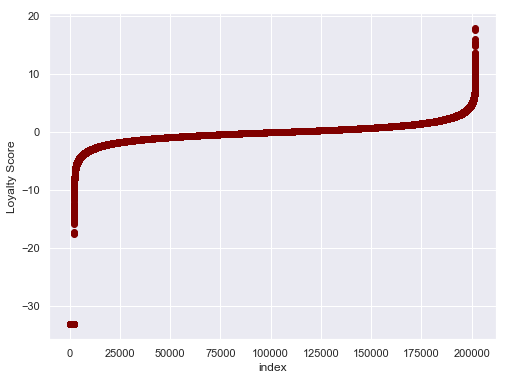

In [61]:
# Plotting the "target" column from train_df



plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df["target"].values),color = 'maroon')
plt.xlabel('index', fontsize=12)
plt.ylabel('Loyalty Score', fontsize=12)
plt.show()


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



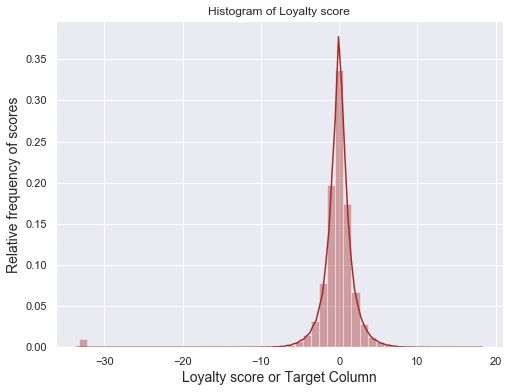

In [62]:
# Histogram of loyalty score

# As from the above plot, not a good conclusion of the loyalty score can be seen therefore we go for the histogram plot. 
# It can be seen that it follows a normal distribution curve for the loyalty score with a mean of zero and standard 
# deviation of +- 4sigma. For the data points, which are out of 4sigma that data points are the outliers in this case values 
# greater than -30 are consider as outlier values.

target_col = "target"   # variable for target_col

plt.figure(figsize=(8,6))
sns.distplot(train_df[target_col].values, bins=50, color="brown")
plt.title("Histogram of Loyalty score")
plt.xlabel('Loyalty score or Target Column', fontsize=14)
plt.ylabel('Relative frequency of scores', fontsize=14)
plt.show()


__Counting the numbers of id which is below score -30. There are total 2207 of them.__

In [63]:
(train_df['target']<-30).sum()

2207

__Exploration is always done to read the tabulated data. In this exploration, the histogram and scatter plot of target column is plotted in terms of their frequency just to analyze the shape of the predicted column and to check if the distribution follows is a normal distribution with a mean of ‘ZERO’ and a standard deviation of +- 1. Herein, it is seen that some of the loyalty score shares a score of less than -30. This can be concluded that with so low rating of loyalty scores, will lead to not recommended zone for the next time.__

__NOTE:__ It is clear from the dataset the feature_1, feature_2, feature_3 all are categorical variables

Number of categories of each of them is as follows:

__feature_1 : Five categories (1, 2, 3, 4, 5)__

__feature_2 : Three categories (1, 2, 3)__

__feature_3 : Two categories (0, 1)__

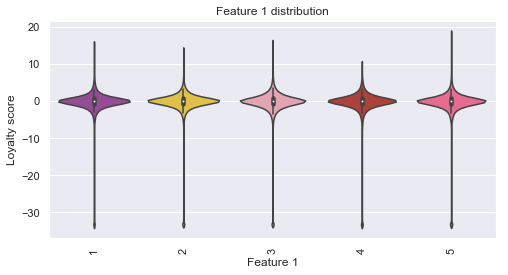

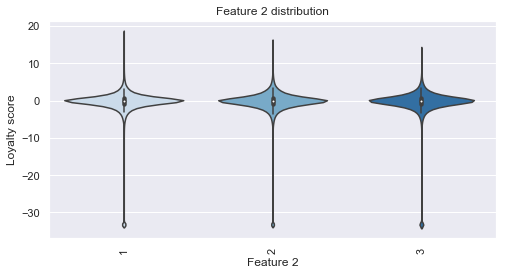

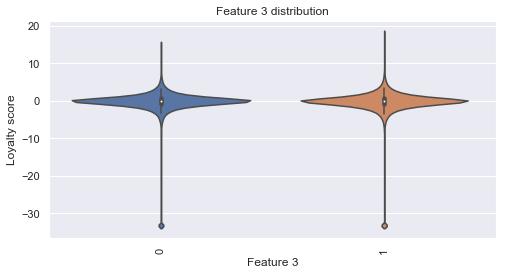

Plots gives the density destribution of each category of each feature.


In [64]:
# Making plots of other features of dataset

# We are plotting the Violin Plots for the features. These are similar to box plots, except that it shows 
# the kernel probability density of data at different points. So, this violin plot is plotted for all the features 
# with the loyalty scores.

colors = [
                    '#A040A0',  
                    '#F8D030',  
                    '#EE99AC',  
                    '#C03028',  
                    '#F85888',  
                    '#B8A038',  
                    '#705898',  
                    '#98D8D8',  
                    '#7038F8',  
                   ]
# feature 1
plt.figure(figsize=(8,4))
sns.violinplot(x="feature_1", palette=colors, y= target_col, data=train_df)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 1 distribution")
plt.show()


# feature 2
plt.figure(figsize=(8,4))
sns.violinplot(x="feature_2", palette='Blues', y= target_col, data=train_df)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 2', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 2 distribution")
plt.show()

# feature 3
plt.figure(figsize=(8,4))
sns.violinplot(x="feature_3", y= target_col, data=train_df)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 3', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 3 distribution")
plt.show()

print("Plots gives the density destribution of each category of each feature.")

#### The distribution of the different categories in all three features look kind of similar, then models are able to find something here.

Text(0.5, 0.98, 'Counts of categiories for features')

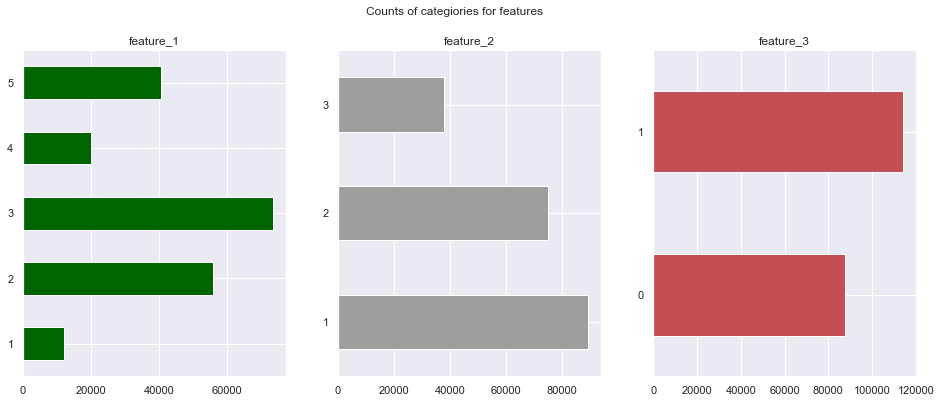

In [65]:
# Bar plots of all the categories of all the feature columns

fig, ax = plt.subplots(1, 3, figsize = (16, 6))
train_df['feature_1'].value_counts().sort_index().plot(kind='barh', align='center',ax=ax[0], color='darkgreen', title='feature_1')
train_df['feature_2'].value_counts().sort_index().plot(kind='barh', ax=ax[1], color='0.62', title='feature_2')
train_df['feature_3'].value_counts().sort_index().plot(kind='barh', ax=ax[2], color='r', title='feature_3')
plt.suptitle('Counts of categiories for features')

__Feature 1 has 5 classes, Feaure 2 has 3 classes and Feature 3 has 2 classes.__

In [66]:
# checking missing data for train_df. There are no missing values in train data set.

total = train_df.isnull().sum().sort_values(ascending = False)
percent = (train_df.isnull().sum()/train_df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
target,0,0.0
feature_3,0,0.0
feature_2,0,0.0
feature_1,0,0.0
card_id,0,0.0
first_active_month,0,0.0


In [67]:
# checking missing data for test_df

total = test_df.isnull().sum().sort_values(ascending = False)
percent = (test_df.isnull().sum()/test_df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
first_active_month,1,0.000809
target,0,0.000000
feature_3,0,0.000000
feature_2,0,0.000000
feature_1,0,0.000000
card_id,0,0.000000


In [68]:
d1 = train_df['first_active_month'].value_counts().sort_index()
d2 = test_df['first_active_month'].value_counts().sort_index()
data = [go.Scatter(x=d1.index, y=d1.values, name='train'), go.Scatter(x=d2.index, y=d2.values, name='test')]
layout = go.Layout(dict(title = "Counts of first active",xaxis = dict(title = 'Month'), yaxis = dict(title = 'Count'),
                  ),legend=dict(orientation="v"))
py.iplot(dict(data=data, layout=layout))

__Trends of counts for train and test data are similar, and this is great. Why there is such a sharp decline at the end of the period? I think it was on purpose. Or maybe new cards are taken into account only after fulfilling some conditions.__

In [69]:
# Created a elapsed time column for each id in train set:

import datetime
def read_data(input_file):
    df = pd.read_csv(input_file)
    df['first_active_month'] = pd.to_datetime(df['first_active_month'])
    df['year'] = df['first_active_month'].dt.year
    df['month'] = df['first_active_month'].dt.month
    df['elapsed_time'] = (datetime.date(2018, 2, 1) - df['first_active_month'].dt.date).dt.days
    return df
train_df = read_data('train.csv')
test_df = read_data('test.csv')

target = train_df['target']


In [70]:
# Forming the corelation Matrix of train_df
train_df.corr()

,feature_1,feature_2,feature_3,target,year,month,elapsed_time
feature_1,1.000000,-0.130969,0.583092,-0.014251,-0.115267,-0.012128,0.117144
feature_2,-0.130969,1.000000,0.060925,-0.006242,-0.151782,-0.027170,0.158150
feature_3,0.583092,0.060925,1.000000,-0.008125,-0.194084,-0.016784,0.196046
target,-0.014251,-0.006242,-0.008125,1.000000,0.040341,0.031512,-0.050453
year,-0.115267,-0.151782,-0.194084,0.040341,1.000000,-0.119644,-0.938988
month,-0.012128,-0.027170,-0.016784,0.031512,-0.119644,1.000000,-0.229130
elapsed_time,0.117144,0.158150,0.196046,-0.050453,-0.938988,-0.229130,1.000000


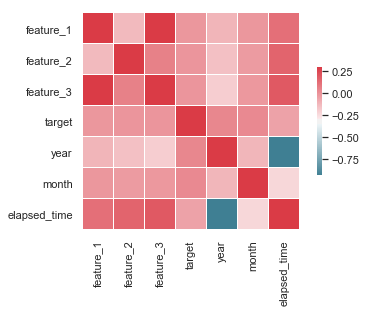

In [71]:
# Forming the corelation Matrix of train_df

train_df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train_df.corr(),cmap=cmap, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5})

__The correlations between the target and any of the features are quite low, but the features 1 and 3 are somewhat decently correlated. Let's take a look at the scatter plots:__

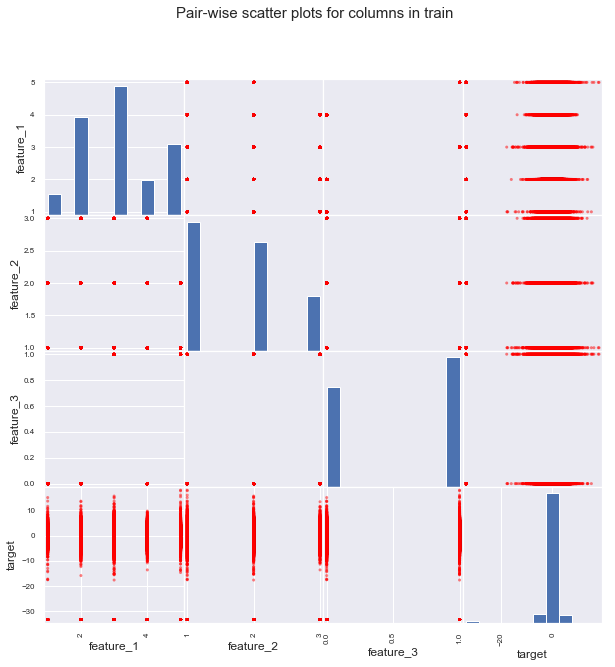

In [72]:
from pandas.plotting import scatter_matrix
select_cols = ['feature_1', 'feature_2', 'feature_3', 'target']
scatter_matrix(train_df[select_cols], figsize=[10,10], color = 'red')
plt.suptitle('Pair-wise scatter plots for columns in train', fontsize=15)
plt.show()


__Again, not a lot of useful information. The only thing I can see is different target variances for different values of the feature_1 , but it's most likely due to the different amount of data corresponding to each feature.__

In [73]:

del train_df['target']

In [74]:
train_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,year,month,elapsed_time
0,2017-06-01,C_ID_92a2005557,5,2,1,2017,6,245
1,2017-01-01,C_ID_3d0044924f,4,1,0,2017,1,396
2,2016-08-01,C_ID_d639edf6cd,2,2,0,2016,8,549
3,2017-09-01,C_ID_186d6a6901,4,3,0,2017,9,153
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,2017,11,92


In [75]:
# Import old Merchant data

merchant_df = pd.read_csv("merchants.csv")
print("shape of merchant : ",merchant_df.shape)

shape of merchant :  (334696, 22)


__Therea are total 334,696 rows and 22 columns in the old mercahnt dataset.__

In [76]:
merchant_df.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [77]:
# checking missing data for old merchant dataset

total = merchant_df.isnull().sum().sort_values(ascending = False)
percent = (merchant_df.isnull().sum()/merchant_df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
category_2,11887,3.551581
avg_sales_lag3,13,0.003884
avg_sales_lag12,13,0.003884
avg_sales_lag6,13,0.003884
merchant_group_id,0,0.000000
merchant_category_id,0,0.000000
subsector_id,0,0.000000
numerical_1,0,0.000000
numerical_2,0,0.000000
category_1,0,0.000000


__The merchant clumn have columns like merchant id average purchase and sales lag, active months and other information about merchants.__

Lets explore the variables in old merchant data

In [78]:
Mer = merchant_df.loc[(merchant_df['numerical_1'] < 0.1) &
                               (merchant_df['numerical_2'] < 0.1) &
                               (merchant_df['avg_sales_lag3'] < 5) &
                               (merchant_df['avg_purchases_lag3'] < 5) &
                               (merchant_df['avg_sales_lag6'] < 10) &
                               (merchant_df['avg_purchases_lag6'] < 10) &
                               (merchant_df['avg_sales_lag12'] < 10) &
                               (merchant_df['avg_purchases_lag12'] < 10)]

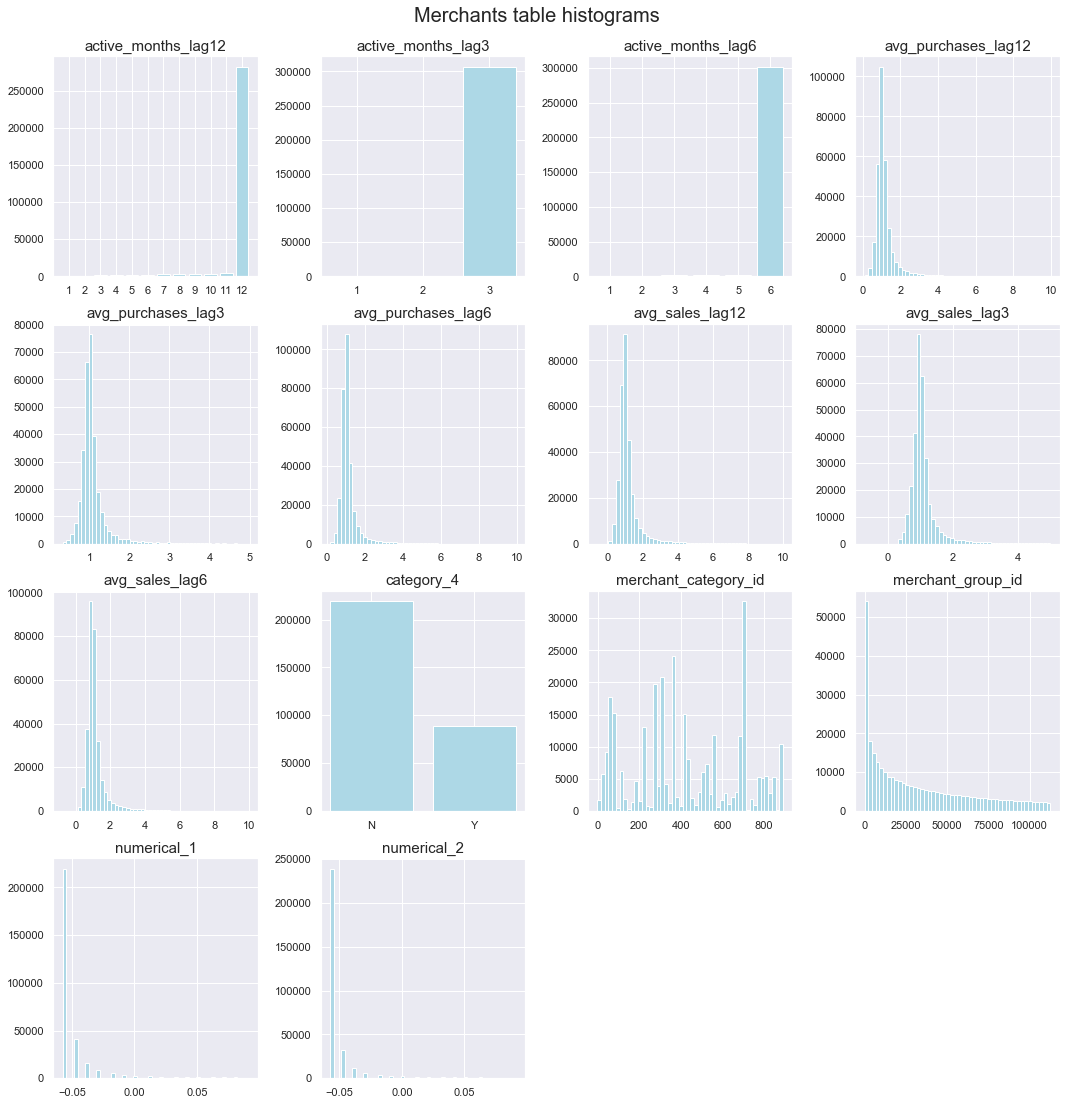

In [79]:
cat_cols = ['active_months_lag6','active_months_lag3','active_months_lag12','category_4']
num_cols = ['numerical_1', 'numerical_2','merchant_group_id','merchant_category_id','avg_sales_lag3', 'avg_purchases_lag3', 'avg_sales_lag6', 'avg_purchases_lag6', 'avg_sales_lag12', 'avg_purchases_lag12']

plt.figure(figsize=[15, 15])
plt.suptitle('Merchants table histograms', y=1.02, fontsize=20)
ncols = 4
nrows = int(np.ceil((len(cat_cols) + len(num_cols))/4))
last_ind = 0
for col in sorted(list(Mer.columns)):
    #print('processing column ' + col)
    if col in cat_cols:
        last_ind += 1
        plt.subplot(nrows, ncols, last_ind)
        vc = Mer[col].value_counts()
        x = np.array(vc.index)
        y = vc.values
        inds = np.argsort(x)
        x = x[inds].astype(str)
        y = y[inds]
        plt.bar(x, y, color=('lightblue'))
        plt.title(col, fontsize=15)
    if col in num_cols:
        last_ind += 1
        plt.subplot(nrows, ncols, last_ind)
        Mer[col].hist(bins = 50, color=('lightblue'))
        plt.title(col, fontsize=15)
    plt.tight_layout()

#### From the histograms we can see several things:

merchant_group_ids are sorted in the descending order. <br>

numerical_1 and numerical_2 seem to represent more of a categorical value as they take a discrete set of values <br>

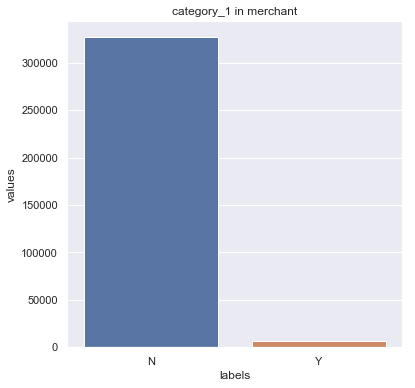

In [80]:
# Values count for category 1 in old merchant data

temp = merchant_df["category_1"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_1 in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

If we check out the category one column, it has 2 catogries that is __'N' and 'Y__'  and most of the values falls under '__N__'  category

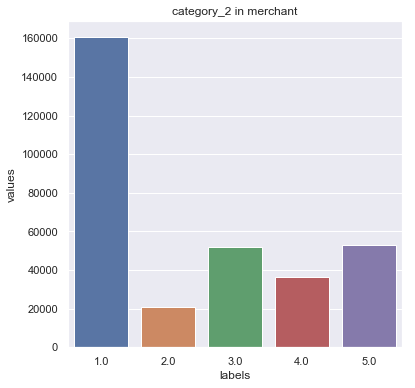

In [81]:
# Values count for category 2 in old merchant data

temp = merchant_df["category_2"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_2 in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

For the category 2 column it has 5 lebels that is 1,2,3,4,5

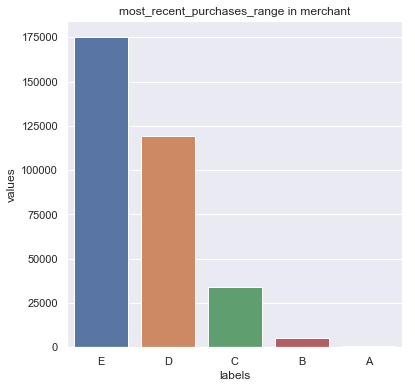

In [82]:
# Values of most recent purchase category

temp = merchant_df["most_recent_purchases_range"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('most_recent_purchases_range in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

For the most recent purchase column, we can see that it has 5 categories and catogogy E has the highest purchase values.

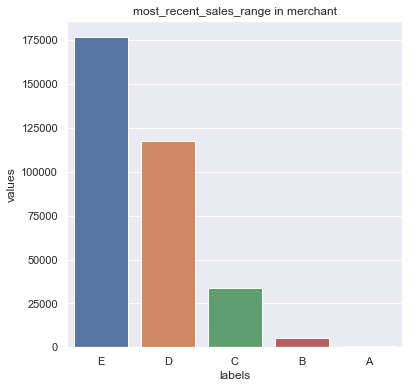

In [83]:
# Values of most recent sales category

temp = merchant_df["most_recent_sales_range"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('most_recent_sales_range in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

For the most recent sales column, we can see that it has 5 categories and catogogy E has the highest sales values, which is expected.

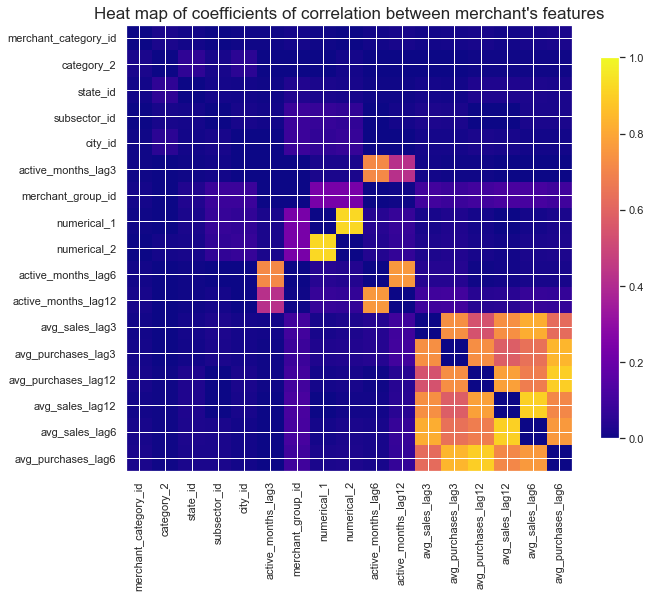

In [84]:
corrs = np.abs(Mer.corr())
ordered_cols = (corrs).sum().sort_values().index
np.fill_diagonal(corrs.values, 0)
plt.figure(figsize=[10,10])
plt.imshow(corrs.loc[ordered_cols, ordered_cols], cmap='plasma', vmin=0, vmax=1)
plt.colorbar(shrink=0.7)
plt.xticks(range(corrs.shape[0]), list(ordered_cols), rotation=90)
plt.yticks(range(corrs.shape[0]), list(ordered_cols))
plt.title('Heat map of coefficients of correlation between merchant\'s features', fontsize=17)
plt.show()

###### The heat map above reveals some relationships:

numerical_1 and numerical_2 are highly correlated <br>
Avg_sales and avg_purchases within the last 3, 6, and 12 months are highly correlated, which is understandable. <br>
mechant_group_id is little correlated with numerical_1, 2. <br>


In [85]:
# Import new merchant data file

new_merchant_df = pd.read_csv("new_merchant_transactions.csv")
print("shape of new_merchant_transactions : ",new_merchant_df.shape)

shape of new_merchant_transactions :  (1048575, 14)


__The new merchant data has 1,048,575 rows and 14 variables.__

In [86]:
new_merchant_df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,3/11/18 14:57,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,3/19/18 18:53,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,4/26/18 14:08,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671926,3/7/18 9:43,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,3/22/18 21:07,NaN,-1,29


__The new merchant data has a columns like authorized flag, installments, merchant category id, month lag and other merchant information.__ 

In [87]:
# checking missing data for old merchant dataset

total = new_merchant_df.isnull().sum().sort_values(ascending = False)
percent = (new_merchant_df.isnull().sum()/new_merchant_df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
category_2,52936,5.048375
category_3,26054,2.484705
merchant_id,12044,1.148606
subsector_id,0,0.000000
state_id,0,0.000000
purchase_date,0,0.000000
purchase_amount,0,0.000000
month_lag,0,0.000000
merchant_category_id,0,0.000000
installments,0,0.000000


There are some missing values in columns like category_1, category_3.

#### Check out the column authorized flag.

In [89]:
new_merchant_df['authorized_flag'].unique()

array(['Y'], dtype=object)

We can see that all the values in authorized flag column  is Y. It seems like they have authorized all the credit cards to the new customers.

In [90]:
categorical_columns = ['city_id', 'category_1', 'category_3','category_2', 'merchant_category_id', 'state_id', 'subsector_id']
new_merchant_df[categorical_columns].head()


,city_id,category_1,category_3,category_2,merchant_category_id,state_id,subsector_id
0,107,N,B,1.0,307,9,19
1,140,N,B,1.0,307,9,19
2,330,N,B,1.0,507,9,14
3,-1,Y,B,NaN,661,-1,8
4,-1,Y,B,NaN,166,-1,29


__Exploring the Historical transactions data.__

In [91]:
# Now lets look at the historical data

hist_df = pd.read_csv("historical_transactions.csv")
hist_df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [92]:
hist_df.shape

(29112361, 14)

__There are total  2.9 million rows and 14 variable in historical dataset.__

__It’s the distribution plot (using seaborn) of the histogram plot plotted for the ‘month_lag’ column. This column belongs to the ‘historical_transactions’ file which gives the historical transaction details for three months for every card transacted. In this plot, the month_lag column states that how many months from the reference date(current transaction) did the transaction(historical transaction) take place.__

In [94]:
hist_df.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

In [95]:
# convert the authorized_flag to a binary value

hist_df['authorized_flag'] = hist_df['authorized_flag'].map({'Y':1, 'N':0})

__We can see that we have null values in some columns like category_3, category_2.__

In [96]:
def aggregate_historical_transactions(history):
    
    history.loc[:, 'purchase_date'] = pd.DatetimeIndex(history['purchase_date']).\
                                      astype(np.int64) * 1e-9
    
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'city_id': ['nunique'],
        'purchase_amount': ['sum', 'median', 'max', 'min', 'std'],
        'installments': ['sum', 'median', 'max', 'min', 'std'],
        'purchase_date': [np.ptp],
        'month_lag': ['min', 'max']
        }
    agg_history = history.groupby(['card_id']).agg(agg_func)
    agg_history.columns = ['hist_' + '_'.join(col).strip() 
                           for col in agg_history.columns.values]
    agg_history.reset_index(inplace=True)
    
    df = (history.groupby('card_id')
          .size()
          .reset_index(name='hist_transactions_count'))
    
    agg_history = pd.merge(df, agg_history, on='card_id', how='left')
    
    return agg_history

history = aggregate_historical_transactions(hist_df)

__Exploring the city id column from historical data__ 

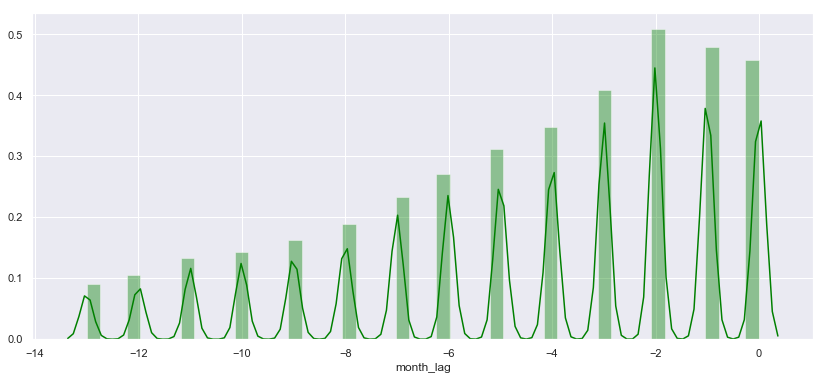

In [97]:
#  Distribution plot for month lag 

f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(hist_df['month_lag'], color = 'green')

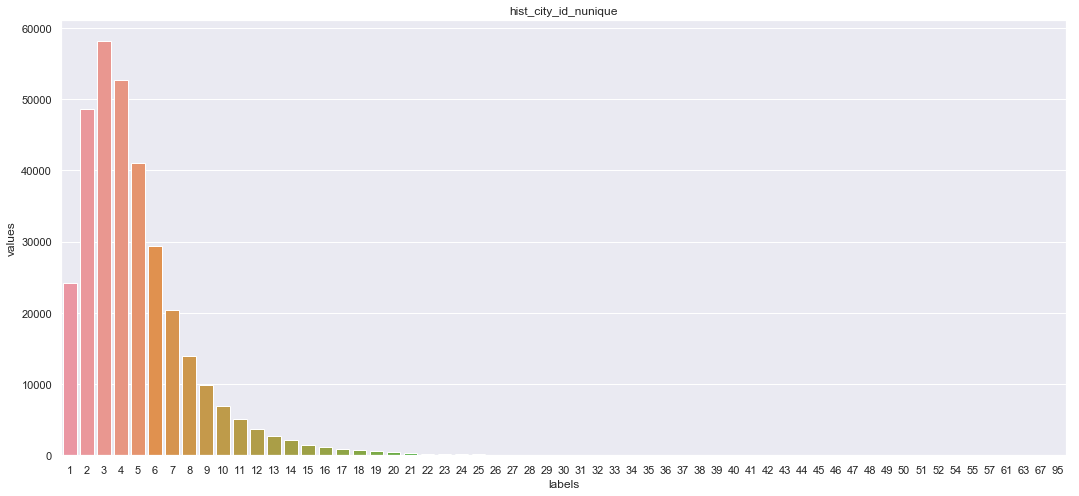

In [98]:

temp = history["hist_city_id_nunique"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (18,8))
plt.title('hist_city_id_nunique')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

__We can see from the bar graph that most of the cities which are labeled from 2 to 7 are the highest user of credit cards.__


__After doing exploratory analysis, there is a huge need of data preprocessing like, changing the type of variables using label encoding and one hot encoding and many others which will be done in data pre processing file.__ 